# Provide Insights to the Product Strategy Team in the Banking Domain

## Problem Statement 

Mitron Bank is a legacy financial institution headquartered in Hyderabad. They
want to introduce a new line of credit cards, aiming to broaden its product
offerings and reach in the financial market.
AtliQ Data Services came to know about this through an internal link and
approached Mitron Bank with a proposal to implement this project. However,
strategy director of Mitron Bank, Mr.Bashnir Rover is skeptical and asked them
to do a pilot project with the sample data before handing them the full project.
They provided a sample dataset of 4000 customers across five cities on their
online spend and other details.

Peter Pandey is a data analyst at AtliQ Data Services and asked by his manager
to take over this project. His role is to analyse the provided sample data and
report key findings to the strategy team of Mitron Bank. This analysis is
expected to guide them in tailoring the credit cards to customer needs and
market trends.

The successful acquisition of this project depends on Peter's ability to provide
actionable, data-driven recommendations and impress Mr. Bashnir Rover & his
team. Peter requested support from his manager Tony Sharma, and he
provided him with some ideas to generate insights based on the data
provided.
Task: Imagine yourself as Peter Pandey and perform the following task:
1. Use “Insight Ideas from Tony.pdf”. Create metrics and visuals accordingly.
2. Design a dashboard with your metrics and analysis. The end users of this
dashboard are top-level management and product strategy team - hence the
dashboard should be self-explanatory and easy to understand.
codebasics.io
3. Present your insights to Mr.Bashnir Rover & team. Be creative and concise
with your presentation. Use your dashboard in the presentation along with the
deck.
4. Use additional data based on your own research to support your
recommendations.
Note:
1. We recommend you create a video presentation of ideally 15 minutes or
less for the business stakeholders. Additionally, make a LinkedIn post
that includes relevant links, your video presentation, and a reflection on
your experience while working on this challenge.
2. You can check out this example presentation to gain some inspiration:
Sample Presentation Link
3. Submit your post link on the resume project challenge page of
codebasics.
(https://codebasics.io/challenge/codebasics-resume-project-challenge)


Insight Ideas from Tony
Demographic classification: Classify the customers based on available
demography such as age group, gender, occupation etc. and provide insights
based on them.
Avg income utilisation %: Find the average income utilisation % of customers
(avg_spends/avg_income). This will be your key metric. The higher the average
income utilisation %, the more is their likelihood to use credit cards.
Spending Insights: Where do people spend money the most? Does it have any
impact due to occupation, gender, city, age etc.? This can help you to add
relevant credit card features for specific target groups.
Key Customer Segments: By doing above, you should be able to identify and
profile key customer segments that are likely to be the highest-value users of
the new credit cards. This includes understanding their demographics,
spending behaviours, and financial preferences.
Credit Card Feature Recommendations: Provide recommendations on what
key features should be included in the credit card which will improve the
likelihood of credit card usage. This should be backed by the insights from data
provided and also some secondary research on the internet for this.
Additional Thoughts: I added above insights based on my initial thoughts.
However, you may get more valuable insights when you delve deep into the
data.
Note: If you find any discrepancies in the data, include that in your
presentation as a consideration.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

customer_data = pd.read_csv('dim_customers.csv')

In [3]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     4000 non-null   object
 1   age_group       4000 non-null   object
 2   city            4000 non-null   object
 3   occupation      4000 non-null   object
 4   gender          4000 non-null   object
 5   marital status  4000 non-null   object
 6   avg_income      4000 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 218.9+ KB


In [5]:
spends=pd.read_csv('fact_spends.csv')
spends.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864000 entries, 0 to 863999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   customer_id   864000 non-null  object
 1   month         864000 non-null  object
 2   category      864000 non-null  object
 3   payment_type  864000 non-null  object
 4   spend         864000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 33.0+ MB


In [6]:
# Merge the two dataframes on 'customer_id'
merged_data = pd.merge(customer_data, spends, on='customer_id')

# Demographic classification
grouped = merged_data.groupby(['age_group', 'gender', 'occupation'])

# Average income utilization %
merged_data['income_utilization'] = merged_data['spend'] / merged_data['avg_income']

# Spending insights
spending_insights = merged_data.groupby(['occupation', 'gender', 'city', 'age_group'])['spend'].mean()

# Key customer segments


In [8]:
merged_data

customer_id age_group       city             occupation gender  \
0       ATQCUS1825       45+  Bengaluru  Salaried IT Employees   Male   
1       ATQCUS1825       45+  Bengaluru  Salaried IT Employees   Male   
2       ATQCUS1825       45+  Bengaluru  Salaried IT Employees   Male   
3       ATQCUS1825       45+  Bengaluru  Salaried IT Employees   Male   
4       ATQCUS1825       45+  Bengaluru  Salaried IT Employees   Male   
...            ...       ...        ...                    ...    ...   
863995  ATQCUS3477     25-34     Mumbai        Business Owners   Male   
863996  ATQCUS3477     25-34     Mumbai        Business Owners   Male   
863997  ATQCUS3477     25-34     Mumbai        Business Owners   Male   
863998  ATQCUS3477     25-34     Mumbai        Business Owners   Male   
863999  ATQCUS3477     25-34     Mumbai        Business Owners   Male   

       marital status  avg_income      month           category payment_type  \
0             Married       73523        May        Electronics  Net Banking   
1             Married       73523        May          Groceries   Debit Card   
2             Married       73523       June              Bills  Credit Card   
3             Married       73523  September            Apparel   Debit Card   
4             Married       73523        May               Food   Debit Card   
...               ...         ...        ...                ...          ...   
863995         Single       73541        May              Bills  Net Banking   
863996         Single       73541    October            Apparel          UPI   
863997         Single       73541  September               Food   Debit Card   
863998         Single       73541       June            Apparel  Net Banking   
863999         Single       73541  September  Health & Wellness  Credit Card   

        spend  income_utilization  
0         405            0.005508  
1        1096            0.014907  
2        2765            0.037607  
3         363            0.004937  
4         334            0.004543  
...       ...                 ...  
863995    548            0.007452  
863996    174            0.002366  
863997    346            0.004705  
863998     54            0.000734  
863999   1155            0.015706  

[864000 rows x 12 columns]

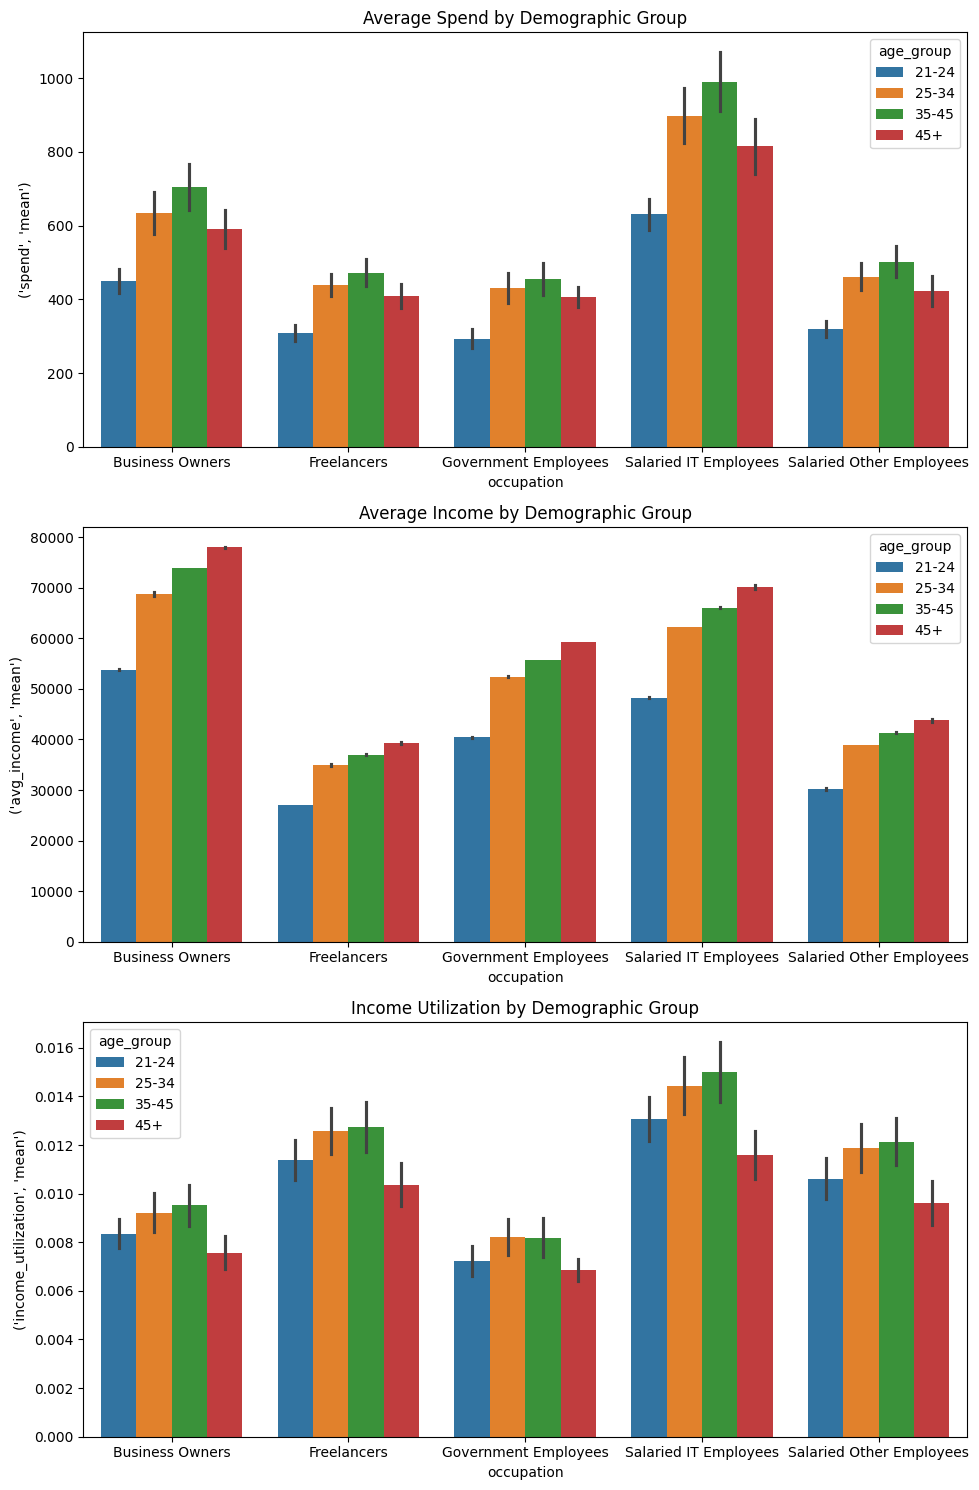

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by demographic features
grouped = merged_data.groupby(['age_group', 'gender', 'occupation'])

# Calculate statistics for each group
grouped_stats = grouped.agg({
    'spend': ['mean'],
    'avg_income': ['mean'],
    'income_utilization': ['mean']
})

# Reset the index to make 'age_group', 'gender', and 'occupation' into columns
grouped_stats.reset_index(inplace=True)

# Plot graphs
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Average spend by demographic group
sns.barplot(x='occupation', y=('spend', 'mean'), hue='age_group', data=grouped_stats, ax=axs[0])
axs[0].set_title('Average Spend by Demographic Group')

# Average income by demographic group
sns.barplot(x='occupation', y=('avg_income', 'mean'), hue='age_group', data=grouped_stats, ax=axs[1])
axs[1].set_title('Average Income by Demographic Group')

# Income utilization by demographic group
sns.barplot(x='occupation', y=('income_utilization', 'mean'), hue='age_group', data=grouped_stats, ax=axs[2])
axs[2].set_title('Income Utilization by Demographic Group')

plt.tight_layout()
plt.show()

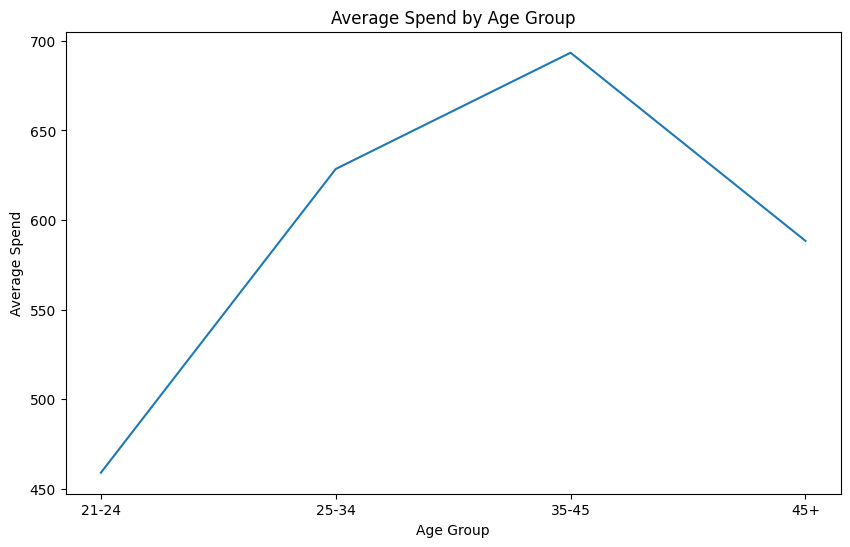

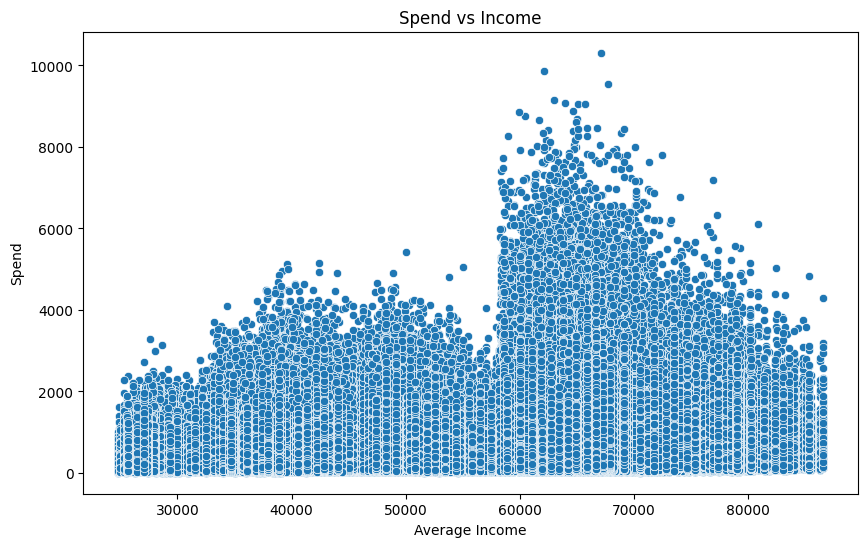

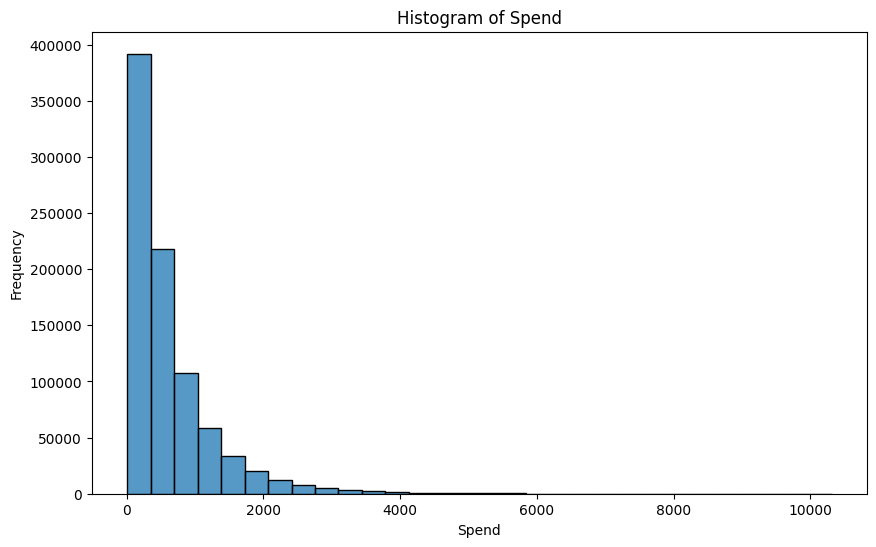

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot of average spend by age group
avg_spend_age = merged_data.groupby('age_group')['spend'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_spend_age.index, y=avg_spend_age.values)
plt.title('Average Spend by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spend')
plt.show()

# Scatter plot of spend vs income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_income', y='spend', data=merged_data)
plt.title('Spend vs Income')
plt.xlabel('Average Income')
plt.ylabel('Spend')
plt.show()

# Histogram of spend
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['spend'], bins=30)
plt.title('Histogram of Spend')
plt.xlabel('Spend')
plt.ylabel('Frequency')
plt.show()

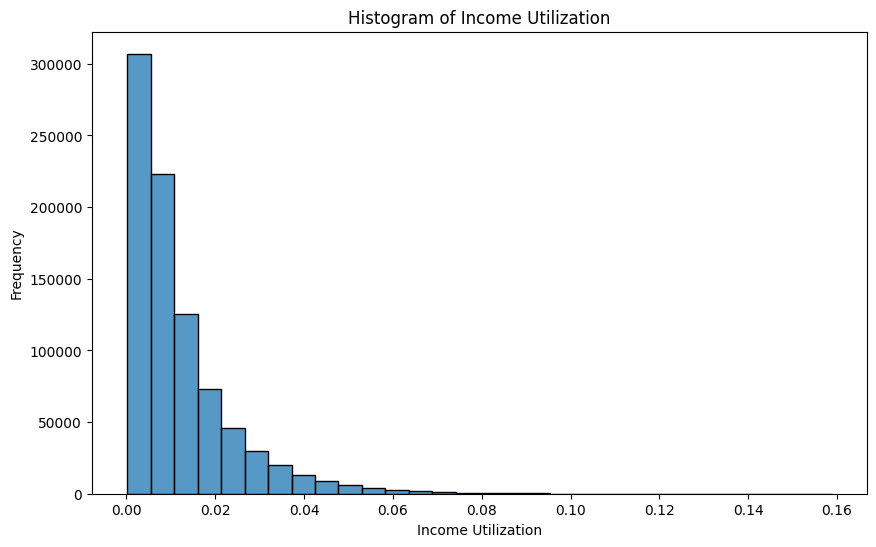

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate income utilization for each customer
merged_data['income_utilization'] = merged_data['spend'] / merged_data['avg_income']

# Plot a histogram of income utilization
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['income_utilization'], bins=30)
plt.title('Histogram of Income Utilization')
plt.xlabel('Income Utilization')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Calculate average spend for each category
avg_spend_category = merged_data.groupby('category')['spend'].mean()

# Calculate average spend for each occupation
avg_spend_occupation = merged_data.groupby('occupation')['spend'].mean()

# Calculate average spend for each gender
avg_spend_gender = merged_data.groupby('gender')['spend'].mean()

# Calculate average spend for each city
avg_spend_city = merged_data.groupby('city')['spend'].mean()

# Calculate average spend for each age group
avg_spend_age_group = merged_data.groupby('age_group')['spend'].mean()

# Print the results
print('Average Spend by Category:\n', avg_spend_category)
print('Average Spend by Occupation:\n', avg_spend_occupation)
print('Average Spend by Gender:\n', avg_spend_gender)
print('Average Spend by City:\n', avg_spend_city)
print('Average Spend by Age Group:\n', avg_spend_age_group)

Average Spend by Category:
 category
Apparel               354.541677
Bills                1092.841333
Electronics           828.773125
Entertainment         430.095438
Food                  458.473646
Groceries             898.997510
Health & Wellness     683.331948
Others                166.220646
Travel                616.909625
Name: spend, dtype: float64
Average Spend by Occupation:
 occupation
Business Owners             646.713029
Freelancers                 446.066220
Government Employees        419.131370
Salaried IT Employees       871.974297
Salaried Other Employees    453.691707
Name: spend, dtype: float64
Average Spend by Gender:
 gender
Female    573.373584
Male      636.664166
Name: spend, dtype: float64
Average Spend by City:
 city
Bengaluru    616.573143
Chennai      443.375905
Delhi NCR    693.508307
Hyderabad    527.138959
Mumbai       738.844581
Name: spend, dtype: float64
Average Spend by Age Group:
 age_group
21-24    459.097638
25-34    628.483608
35-45    693.31

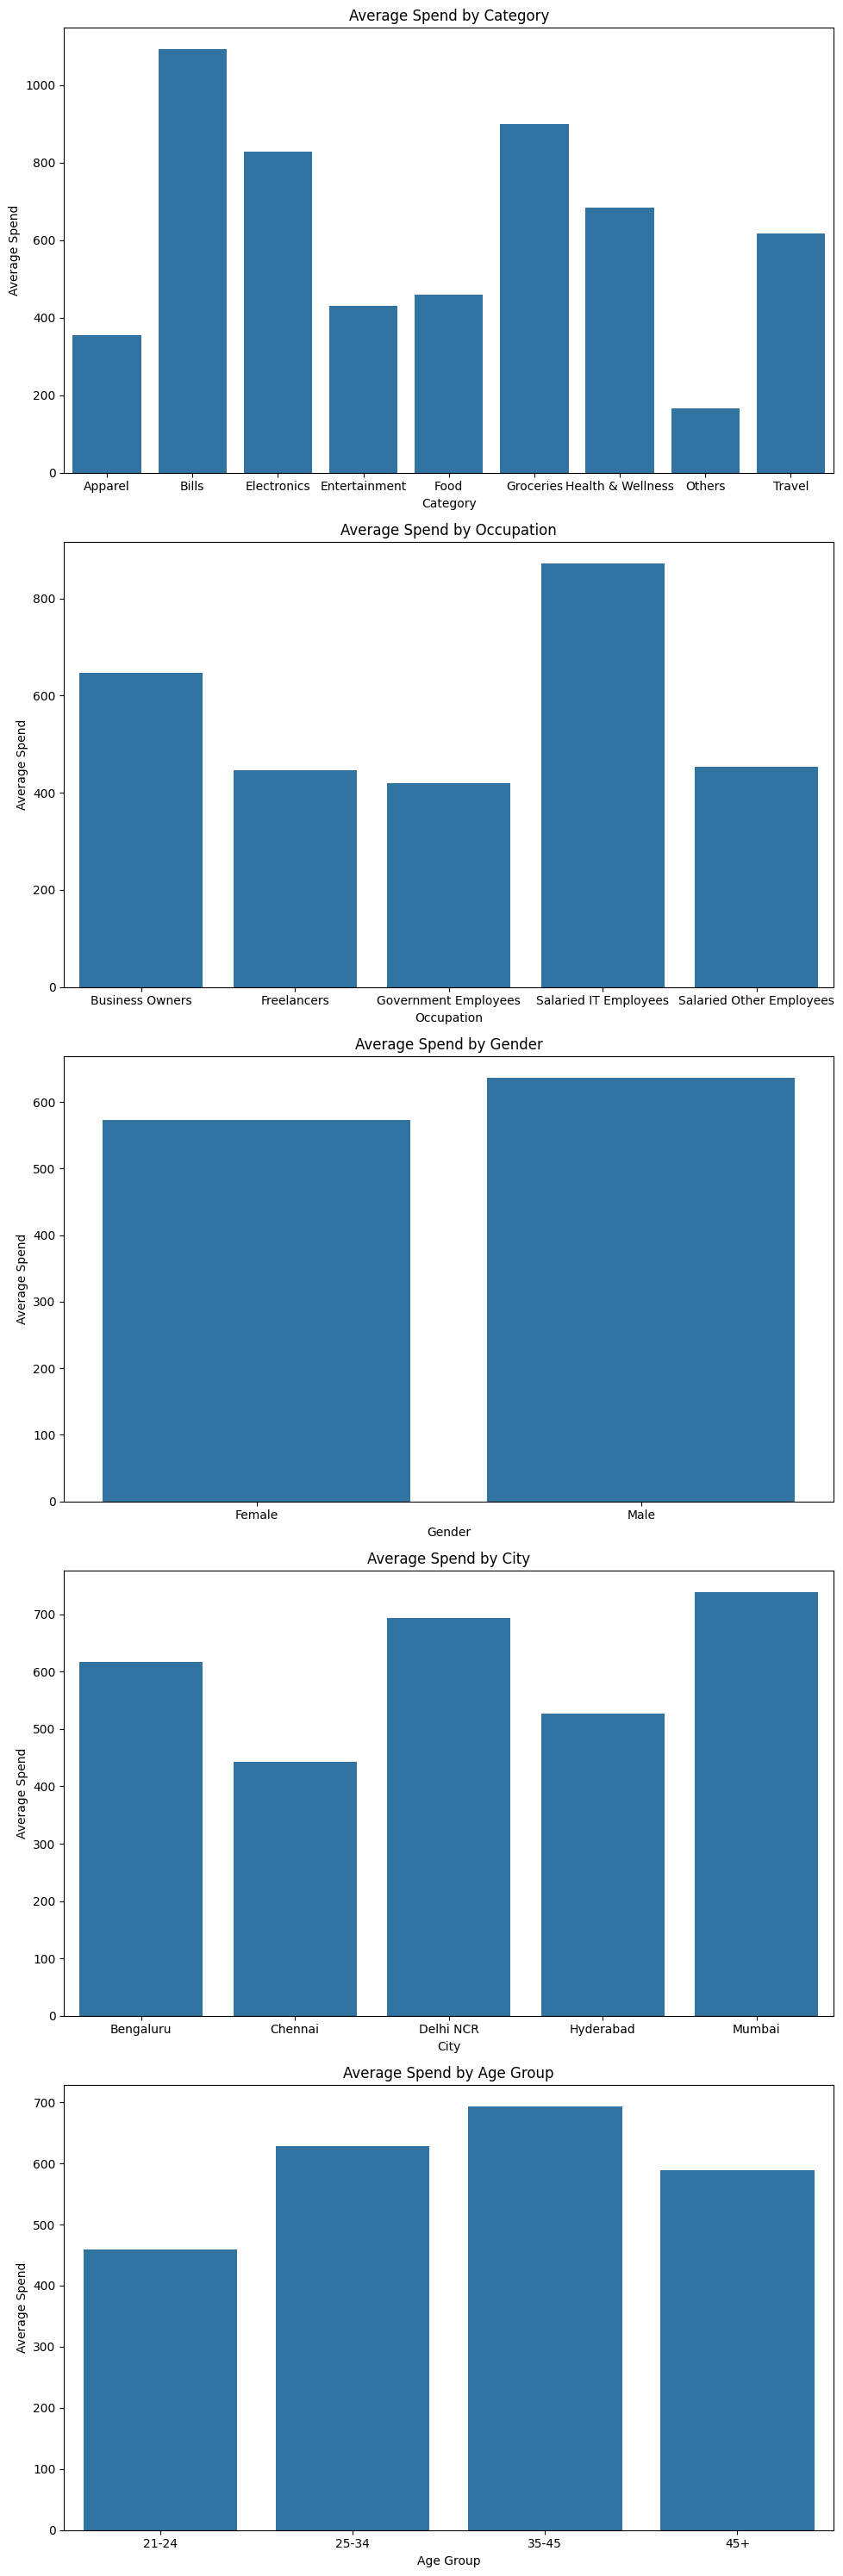

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 5 subplots
fig, axs = plt.subplots(5, 1, figsize=(10, 30))

# Plot average spend by category
sns.barplot(x=avg_spend_category.index, y=avg_spend_category.values, ax=axs[0])
axs[0].set_title('Average Spend by Category')
axs[0].set_xlabel('Category')
axs[0].set_ylabel('Average Spend')

# Plot average spend by occupation
sns.barplot(x=avg_spend_occupation.index, y=avg_spend_occupation.values, ax=axs[1])
axs[1].set_title('Average Spend by Occupation')
axs[1].set_xlabel('Occupation')
axs[1].set_ylabel('Average Spend')

# Plot average spend by gender
sns.barplot(x=avg_spend_gender.index, y=avg_spend_gender.values, ax=axs[2])
axs[2].set_title('Average Spend by Gender')
axs[2].set_xlabel('Gender')
axs[2].set_ylabel('Average Spend')

# Plot average spend by city
sns.barplot(x=avg_spend_city.index, y=avg_spend_city.values, ax=axs[3])
axs[3].set_title('Average Spend by City')
axs[3].set_xlabel('City')
axs[3].set_ylabel('Average Spend')

# Plot average spend by age group
sns.barplot(x=avg_spend_age_group.index, y=avg_spend_age_group.values, ax=axs[4])
axs[4].set_title('Average Spend by Age Group')
axs[4].set_xlabel('Age Group')
axs[4].set_ylabel('Average Spend')

# Display the plots
plt.tight_layout()
plt.show()

In [17]:
# Group the data by demographic features
grouped = merged_data.groupby(['age_group', 'gender', 'occupation', 'city'])

# Calculate statistics for each group
grouped_stats = grouped.agg({
    'spend': ['mean', 'sum', 'count'],
    'avg_income': ['mean', 'sum'],
    'income_utilization': ['mean']
})

# Sort the groups by total spend
grouped_stats.sort_values(('spend', 'sum'), ascending=False, inplace=True)

# Print the grouped statistics
print(grouped_stats)

                                                        spend            \
                                                         mean       sum   
age_group gender occupation            city                               
35-45     Male   Salaried IT Employees Mumbai     1307.337384  18072632   
25-34     Male   Salaried IT Employees Mumbai     1195.502792  16268402   
                                       Delhi NCR  1082.226935  13090617   
35-45     Female Salaried IT Employees Mumbai     1097.948906  13043633   
          Male   Salaried IT Employees Delhi NCR  1188.705864  11554221   
...                                                       ...       ...   
21-24     Female Freelancers           Chennai     198.734568    128780   
45+       Female Freelancers           Hyderabad   279.627315    120799   
21-24     Female Business Owners       Chennai     272.976852    117926   
45+       Female Freelancers           Chennai     255.435185    110348   
                 Governme

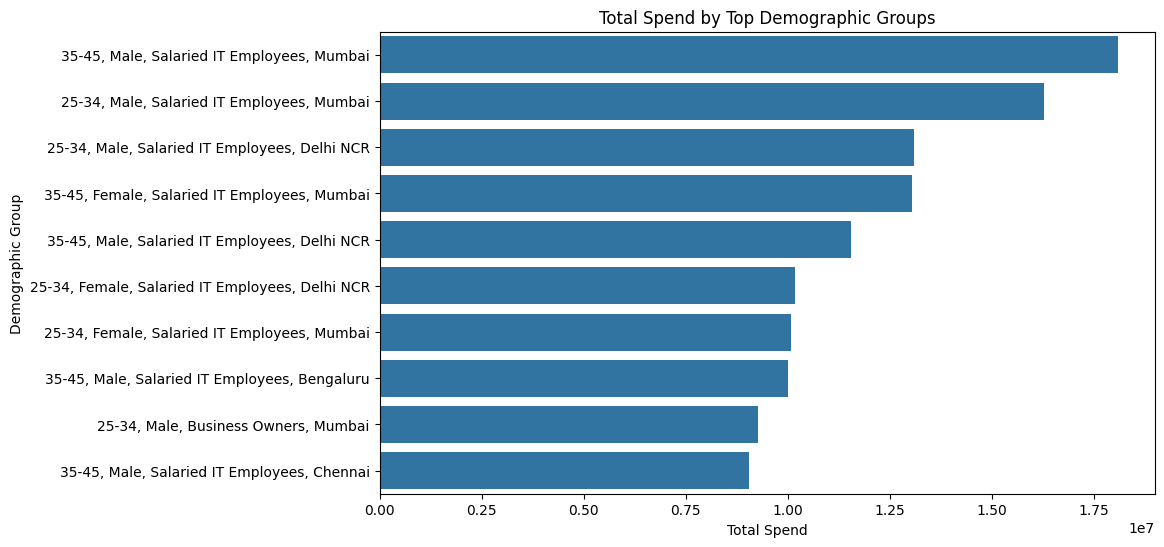

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset the index to make 'age_group', 'gender', 'occupation', and 'city' into columns
grouped_stats.reset_index(inplace=True)

# Create a new column for the demographic group
grouped_stats['demographic_group'] = grouped_stats['age_group'] + ', ' + grouped_stats['gender'] + ', ' + grouped_stats['occupation'] + ', ' + grouped_stats['city']

# Select the top 10 groups by total spend
top_groups = grouped_stats.nlargest(10, ('spend', 'sum'))

# Plot a bar graph of total spend for the top groups
plt.figure(figsize=(10, 6))
sns.barplot(x=('spend', 'sum'), y='demographic_group', data=top_groups)
plt.title('Total Spend by Top Demographic Groups')
plt.xlabel('Total Spend')
plt.ylabel('Demographic Group')
plt.show()

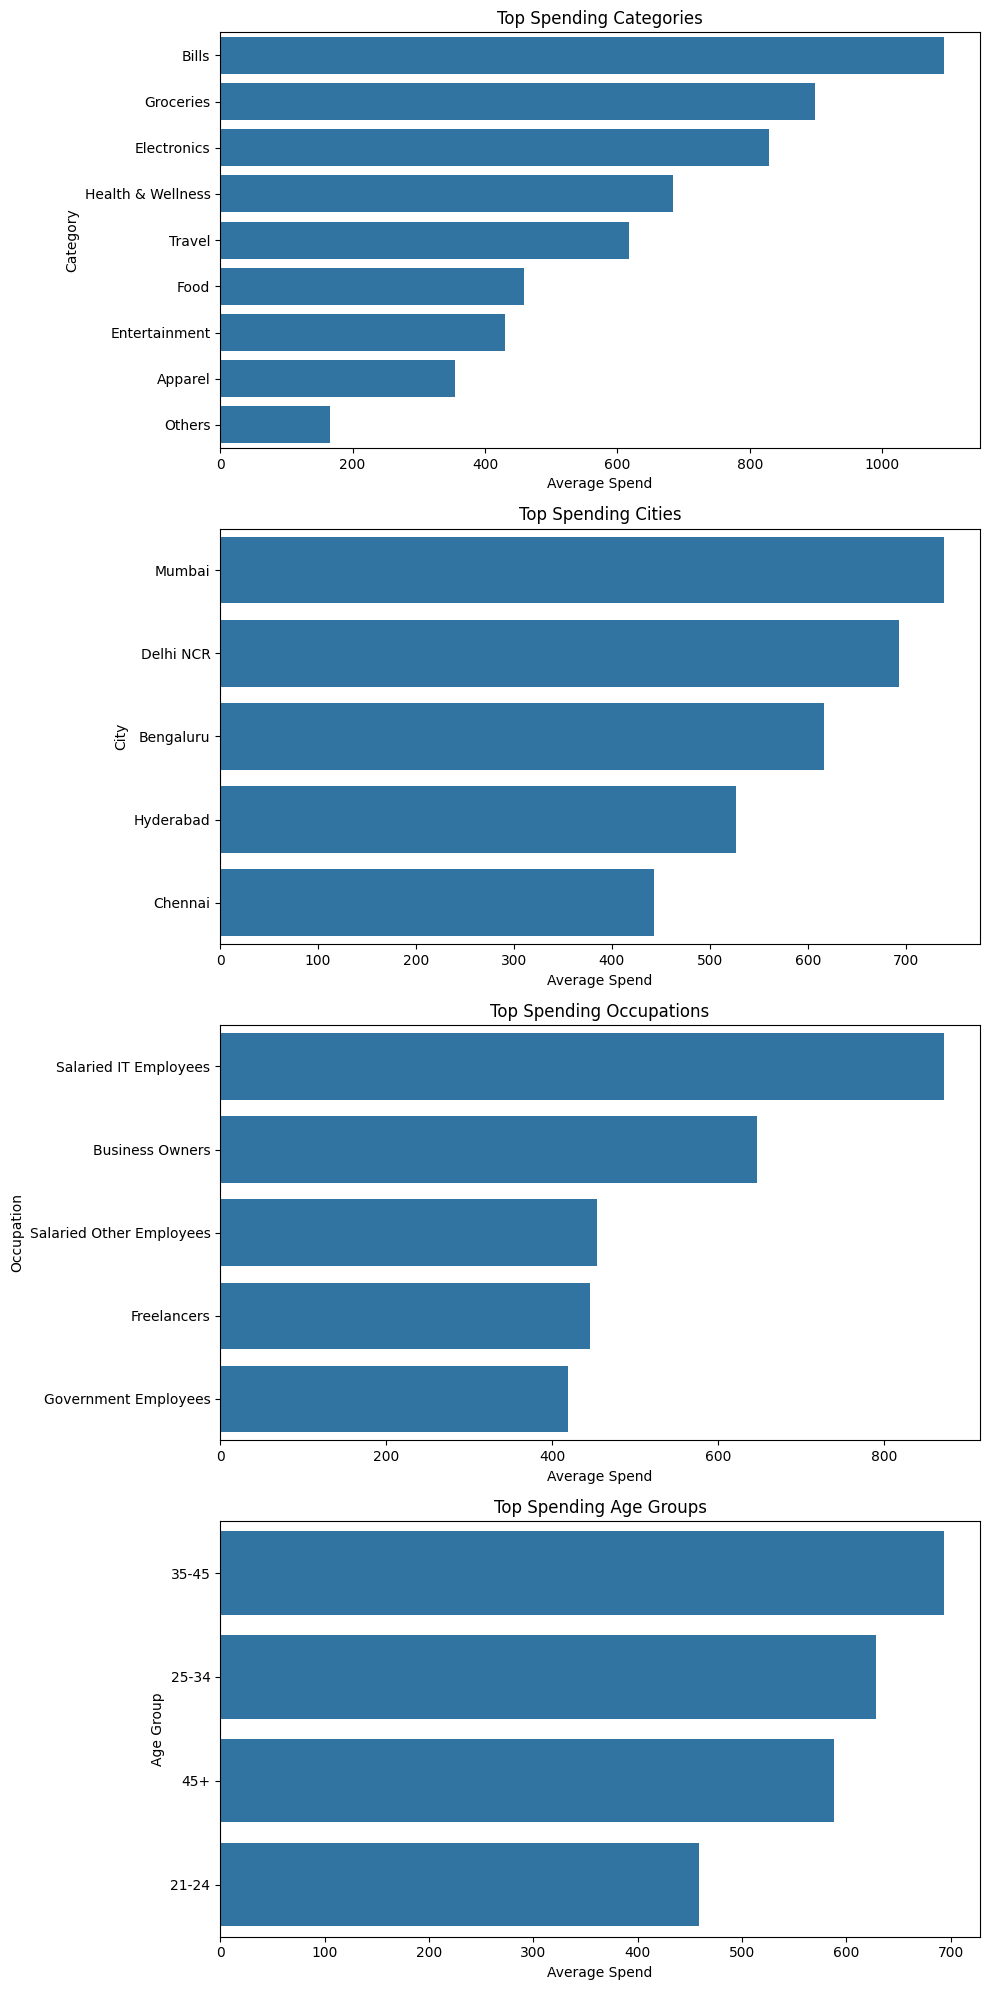

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 4 subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 20))

# Plot top spending categories
top_categories = avg_spend_category.nlargest(10)
sns.barplot(x=top_categories.values, y=top_categories.index, ax=axs[0])
axs[0].set_title('Top Spending Categories')
axs[0].set_xlabel('Average Spend')
axs[0].set_ylabel('Category')

# Plot top spending cities
top_cities = avg_spend_city.nlargest(10)
sns.barplot(x=top_cities.values, y=top_cities.index, ax=axs[1])
axs[1].set_title('Top Spending Cities')
axs[1].set_xlabel('Average Spend')
axs[1].set_ylabel('City')

# Plot top spending occupations
top_occupations = avg_spend_occupation.nlargest(10)
sns.barplot(x=top_occupations.values, y=top_occupations.index, ax=axs[2])
axs[2].set_title('Top Spending Occupations')
axs[2].set_xlabel('Average Spend')
axs[2].set_ylabel('Occupation')

# Plot top spending age groups
top_age_groups = avg_spend_age_group.nlargest(10)
sns.barplot(x=top_age_groups.values, y=top_age_groups.index, ax=axs[3])
axs[3].set_title('Top Spending Age Groups')
axs[3].set_xlabel('Average Spend')
axs[3].set_ylabel('Age Group')

# Display the plots
plt.tight_layout()
plt.show()

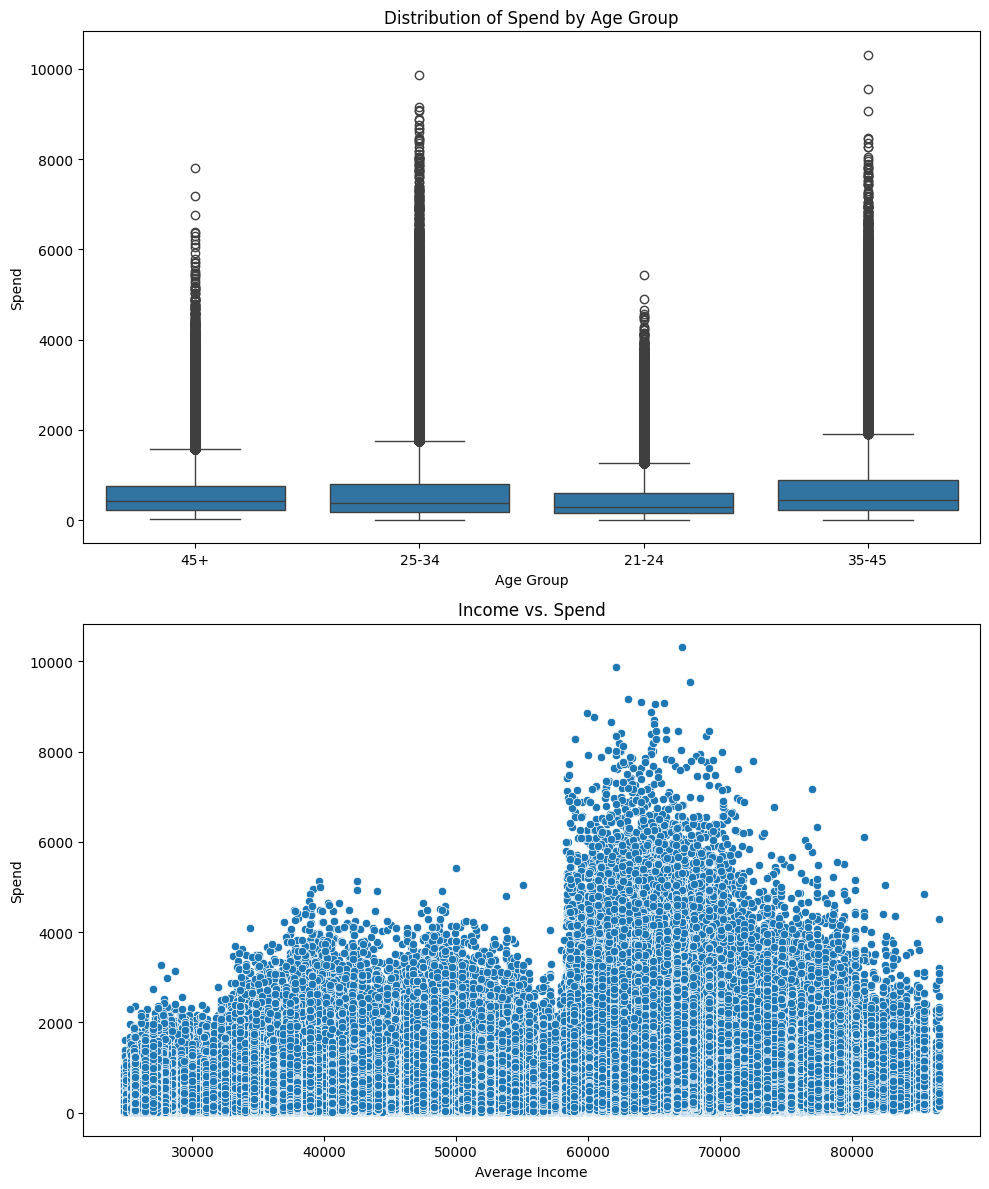

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 2 subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot a boxplot of spend by age group
sns.boxplot(x='age_group', y='spend', data=merged_data, ax=axs[0])
axs[0].set_title('Distribution of Spend by Age Group')
axs[0].set_xlabel('Age Group')
axs[0].set_ylabel('Spend')

# Plot a scatterplot of income vs. spend
sns.scatterplot(x='avg_income', y='spend', data=merged_data, ax=axs[1])
axs[1].set_title('Income vs. Spend')
axs[1].set_xlabel('Average Income')
axs[1].set_ylabel('Spend')

# Display the plots
plt.tight_layout()
plt.show()

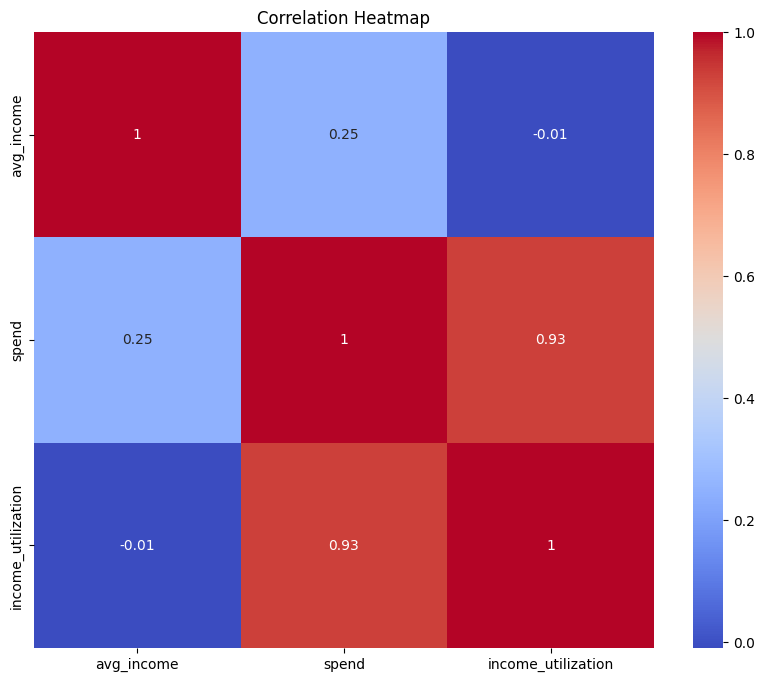

In [22]:
# Remove non-numeric columns from merged_data
numeric_columns = merged_data.select_dtypes(include=[np.number]).columns
numeric_data = merged_data[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



In [23]:
import plotly.express as px

# Create a Sunburst chart
fig = px.sunburst(data_frame=merged_data, path=['age_group', 'gender', 'occupation', 'city'], values='spend')

# Show the chart
fig.show()
